In [42]:
# # coding=utf-8
# import geopandas as gp


# def fs_api():
#     import foursquare
#     clients_id_secret = [
#         ('B5UXLIK21H3XVVIIKBYVG55XXOAVF50OAEFYT5KNWEZ0AJFS', 'AZGHYGMVF3CPO0VUWQWIFP4DYBEIPUOLCT31SUKVTA3FOQRP'),
#         ('VLX3BBUP4VTKT5BP53CBWMTKUWGVGBE34O52S4ULNWAAJURO', '2534VD02WWGCJCILTTRJXXEOPLDTXDVREKXAKGX515HJV3H0'),
#         ('VJR0HIRSW5AEWJL1U0YVP2CJNNY1DOMEBRBM3XD15MW55LQZ', 'MM55NWKDFC51M1PU2I3GNXDJQ0NNIDKNVBRNZJSW4COLBQIR'),
#         ('CWCA2GY2YJKS4GTCBU4V3KI0KH2KMDVZXVJVKFS5C3VPXGCV', 'NLMSW00OFS2FZDYIEA5ZPM4RH35ZAHHFGQSTTC3BYGGX0OIS'),
#         ('GOOWLBFKGWVYJA5E4ES5MUQCF5B2NWITHFNCCVUOLIIN3ZF3', 'UUZ32DS3U5CC22XJ5LIO3RVVMRWL4NFYOM2V3SZ0H1ETWKSC'),
#         ('FJLWGSADBT2R1ELM0W14CIHSOSDZ0ZVGGKJOV5CUEC3JSUKM', '0SA5RHLJ5LKRPPPAKQMLJVBB0HCWTQJ2LJD5OPO4LCO3H00L'),
#         ('QUKQ3QQUXVAYNJOEYNOJIKLGGFPUTOQ2PWS4PNYJUTVY2UKB', 'BLCCAQAZYXFVLELFDYKJT4EOFLI3WGW4YKMDOIQ2XPFE3J3C'),
#         ('I5QIF0SFJCRMAVBSBV3KEZSCQ02MLQZPJ2JPKIG2UFREDUXL', 'GQDNDG03NP4IXXM0QSIJUL3H3KMX0B2OWRNJRVQX3LH3FFOJ'),
#         ('NRAQWNRMKH4W1BP3SQXTLJEKCQKXYOH1G0WPEBPFHVKEGZTM', 'BU2ST3EPY3MSUMKU1XLNTVV00XYBFDWCNWIVJNCWQ502OF11'),
#     ]

#     clients = [foursquare.Foursquare(client_id=client_id, client_secret=client_secret) for client_id, client_secret in
#                clients_id_secret]
#     return clients

# from shapely.geometry import box
# def raw_venues_in_city(city_path,frsq_venues_raw_path):
#     from src.geom_helper import grid_area
#     import time
#     clients = fs_api()
#     city_poly_gpdf = gp.read_file(city_path)
#     city_poly = city_poly_gpdf.geometry.values[0]
#     w, s, e, n = city_poly.buffer(0.001).bounds  # buffer a little to handle FS inaccuracy
#     grids = grid_area(w, s, e, n, ngrid=100)
# #     gpdf = gp.GeoDataFrame([city_poly]+[box(w,s,e,n) for w,s,e,n in grids], columns=['geometry'])
#     request_cnt = 0
#     data_cach = []
#     while len(grids)>0:
#         w, s, e, n = grids.pop()
#         bbox = box(w, s, e, n)
#         if bbox.intersects(city_poly):
#             client = clients[request_cnt%len(clients)]
#             search = client.venues.search(params={'intent': 'browse', 'sw':'{},{}'.format(s,w), 'ne':'{},{}'.format(n,e), 'limit':50})
#             time.sleep(0.02)
#             request_cnt += 1
#             len_venues = search['venues'].__len__()
#             data_cach.append('{}\t{}\t{}'.format((w,s,e,n),len_venues, search))
#             if len_venues>=50:
#                 new_grids = grid_area(w,s,e,n)
#                 grids.extend(new_grids)
#             if request_cnt%2000==0:
#                 output_file = frsq_venues_raw_path+'{}.txt'.format(request_cnt)
#                 with open(output_file,'w') as f:
#                     print 'writing raw frsq venues: ' + output_file
#                     f.write('\n'.join(data_cach))
#                 data_cach = []
#     if len(data_cach)>0:
#         output_file = frsq_venues_raw_path+'{}.txt'.format(request_cnt)
#         with open(output_file,'w') as f:
#             print 'writing raw frsq venues:  '+output_file
#             f.write('\n'.join(data_cach))
#         data_cach = []

# #     return gpdf


In [32]:
# def show_grids_used(city_path, frsq_venues_raw_path):
#     import glob
#     city_poly_gpdf = gp.read_file(city_path)
#     for fn in glob.glob(frsq_venues_raw_path+'*.txt'):
#         with open(fn) as f:
#             swne_polys = [box(*eval(line.split('\t')[0])) for line in f]
#         gpdf = gp.GeoDataFrame(swne_polys,columns=['geometry'])
#         city_poly_gpdf = city_poly_gpdf.append(gpdf,ignore_index=True)
#     print '# grids used:', city_poly_gpdf.shape[0]-1

#     ax = city_poly_gpdf.plot(figsize=(45,45))
#     fig = ax.get_figure()
#     fig.savefig(frsq_venues_raw_path+u'show_grids_used.png')
    

In [40]:
# def frsq_venues_in_city_geojson(city_path, frsq_venues_raw_path, frsq_venues_in_city_path):
#     from pandas.io.json import json_normalize
#     import shapely.geometry as shpgeo
#     all_venues = []
#     for fn in glob.glob(frsq_venues_raw_path+'*.txt'):
#         with open(fn) as f:
#             for line in f:
#                 wsen, vcnt, data = line.split('\t')
#                 data = eval(data)
#                 venues = data['venues']
#                 all_venues.extend(venues)

#     df_venues = json_normalize(all_venues) 
#     df_venues['categories.name'] = df_venues.categories.apply(lambda x: x[0]['name'] if x else '')
#     df_venues['categories.id'] = df_venues.categories.apply(lambda x: x[0]['id'] if x else '')
#     df_venues['geometry'] = df_venues.apply(lambda x: shpgeo.Point(x['location.lng'], x['location.lat']), axis=1)
#     columns = ['id', 'geometry', 'name', 'stats.checkinsCount', 'stats.tipCount', 'stats.usersCount','categories.name']
#     df_no_dup = df_venues[columns].drop_duplicates('id').copy()
#     df_no_dup.columns = ['id', 'geometry', 'name', 'checkins', 'tips', 'users','category']
#     df_no_dup.shape


#     city_poly_gpdf = gp.read_file(city_path)
#     city_poly = city_poly_gpdf.geometry.values[0]
#     print '# venues in/not in city'
#     print df_no_dup.geometry.apply(lambda x: x.intersects(city_poly)).value_counts()
#     df_no_dup_in_city = df_no_dup[df_no_dup.geometry.apply(lambda x: x.intersects(city_poly))].copy()

#     with open(frsq_venues_in_city_path, 'w') as f:
#         f.write(gp.GeoDataFrame(df_no_dup_in_city).to_json())

In [84]:

# def frsq_near_segments(frsq_venues_in_city_path, city_segments_path, bfr_crs, bfr_func, init_crs=4326):
#     from src.geom_helper import objs_near_segs
#     import os

#     frsq_venues_in_city = gp.read_file(frsq_venues_in_city_path)
#     city_segments = gp.read_file(city_segments_path)
#     frsq_venues_near_segments = objs_near_segs(frsq_venues_in_city, city_segments, bfr_func, bfr_crs, output='objs')
#     print '# venues in city=',frsq_venues_in_city.shape[0]
#     print '# venues near segments=', frsq_venues_near_segments.shape[0]
    
#     fn_venues, ext = os.path.splitext(frsq_venues_in_city_path)
#     fn_segs, ext = os.path.splitext(os.path.basename(city_segments_path))
#     new_path = '{fnv}_near_{fns}{ext}'.format(fnv=fn_venues, fns=fn_segs, ext=ext)
#     with open(new_path, 'w') as f:
#         f.write(frsq_venues_near_segments.to_json())
#     print 'wrote frsq_near_segments:', new_path
    

# venues in city= 30162
# venues near segments= 18170
wrote frsq_near_segments: data/frsq_venues_dc_near_segments_dc_opendc.geojson


In [71]:
# def parse_frsq_taxonomy(frsq_taxonomy_json_path, frsq_taxonomy_csv_path, frsq_taxonomy_tree_path):
#     import json
#     import pandas as pd

#     with open(frsq_taxonomy_json_path) as f:
#         js = json.load(f)
#         categories = js['response']['categories']
    
#     # parse children categories recursively
#     def parse_categories(categories,parent_id,level):
#         result = []
#         for order,cate in enumerate(categories):
#             cid, pluralName, shortName, name, icon = cate['id'], cate['pluralName'], cate['shortName'], cate['name'], cate['icon']        
#             sub_result=[]
#             if 'categories' in cate and cate['categories']:
#                 sub_result = parse_categories(cate['categories'], cid, level+1)
#             result.append([parent_id, cid, pluralName.strip(), shortName.strip(), name.strip(), icon, level,order])
#             result.extend(sub_result)
#     #         break
#         return result

#     df = pd.DataFrame(parse_categories(categories,'root',1))
#     df.columns = ['parent_id', 'cid', 'pluralName', 'shortName', 'name', 'icon', 'level','order']
    
#     print 'parsed FourSquare taxonomy'
#     for i in range(1,7):
#         sub_df = df.query('level==%d' %i)
#         print 'level=', i, '# categories', sub_df.shape[0], 'parent categories', sub_df.parent_id.value_counts().shape[0]

#     df.drop('icon', axis=1).to_csv(frsq_taxonomy_csv_path, encoding='utf-8')

#     with open(frsq_taxonomy_tree_path,'w') as f:
#         f.write('\n'.join(df.apply(lambda x:'{}{}'.format('\t'*x.level, x['name'].encode('utf-8')), axis=1).values))

In [9]:
%matplotlib inline

from src.frsq_helper import raw_venues_in_city, show_grids_used, frsq_venues_in_city_geojson, parse_frsq_taxonomy
from src.constants import fn_city_poly_dc, dir_frsq_raw_venues_dc, fn_frsq_venues_dc,fn_segments_dc, fn_frsq_taxonomy_json, fn_frsq_taxonomy_csv, fn_frsq_taxonomy_tree
data_dir=u'data/'
city_path = data_dir + fn_city_poly_dc
frsq_venues_raw_path = data_dir + dir_frsq_raw_venues_dc
frsq_venues_in_city_path = data_dir+fn_frsq_venues_dc
city_segments_path = data_dir + fn_segments_dc
frsq_taxonomy_json_path = data_dir + fn_frsq_taxonomy_json
frsq_taxonomy_csv_path = data_dir + fn_frsq_taxonomy_csv
frsq_taxonomy_tree_path = data_dir + fn_frsq_taxonomy_tree

In [4]:
raw_venues_in_city(city_path, frsq_venues_raw_path)

writing raw frsq venues: data/frsq_raw_venues/dc/2000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/4000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/6000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/8000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/10000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/12000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/14000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/16000.txt
writing raw frsq venues: data/frsq_raw_venues/dc/18000.txt
writing raw frsq venues:  data/frsq_raw_venues/dc/18078.txt


# grids used: 18078


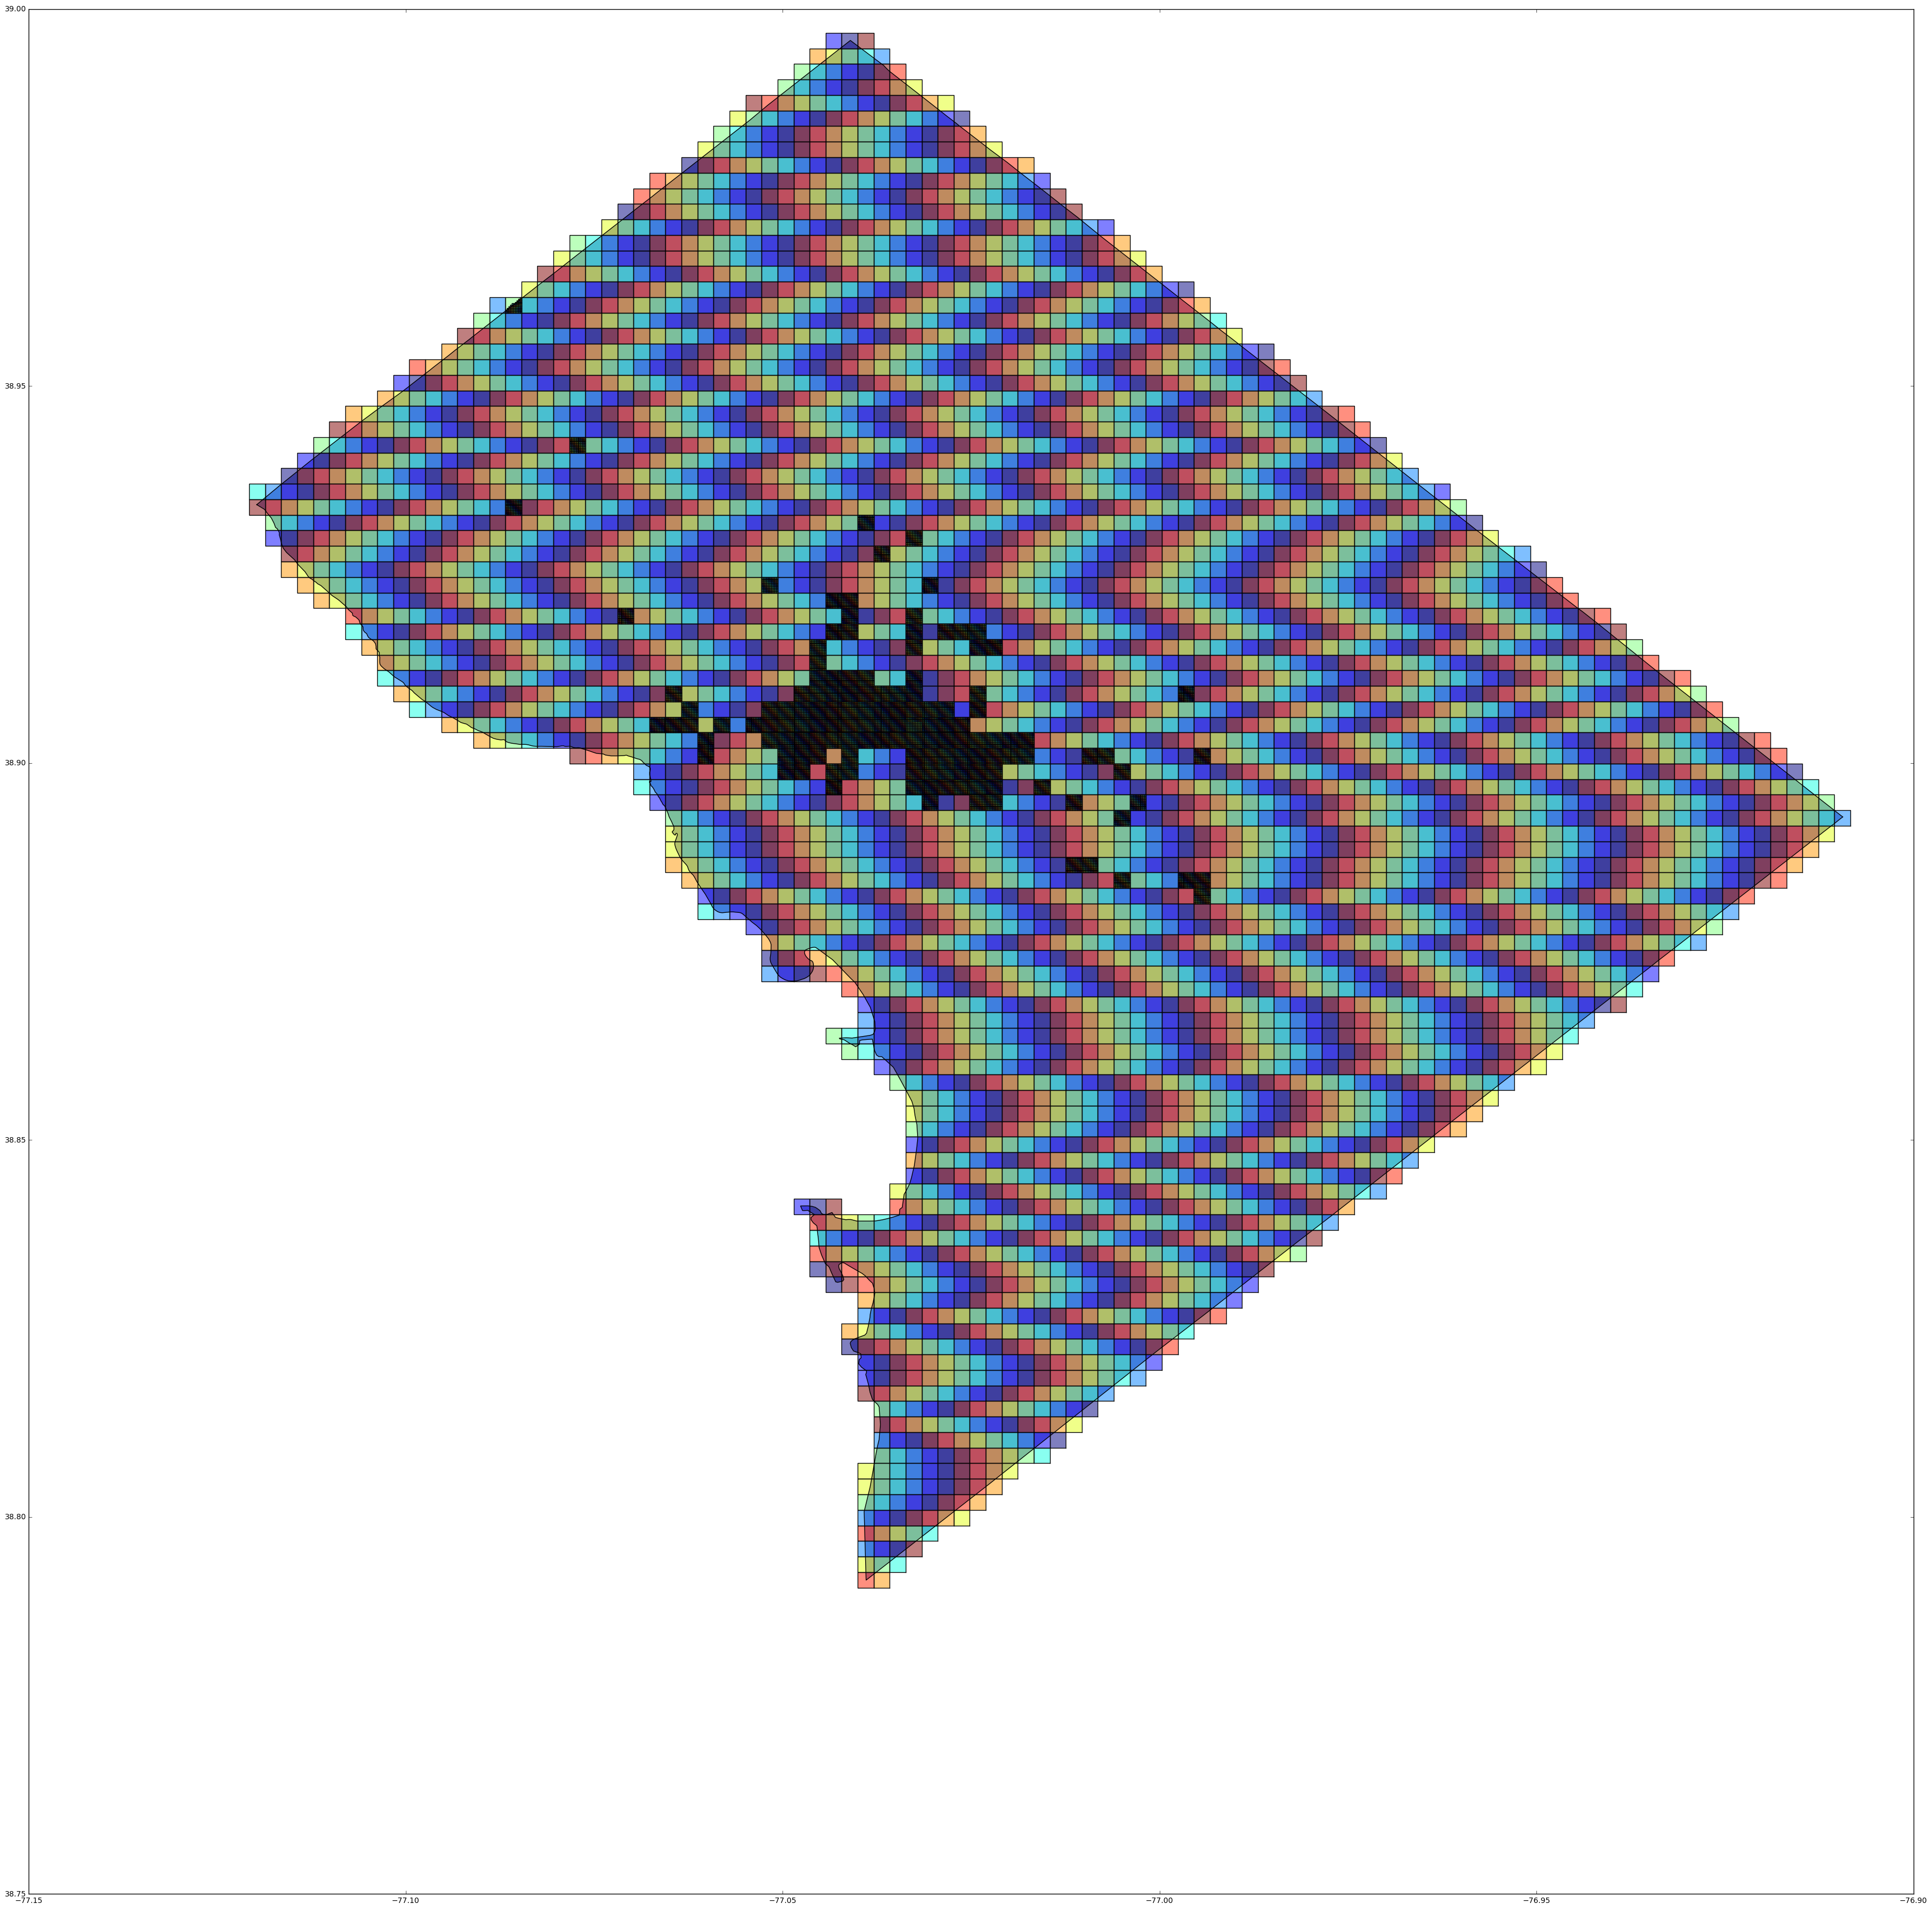

In [10]:
show_grids_used(city_path, frsq_venues_raw_path)

In [11]:
frsq_venues_in_city_geojson(city_path, frsq_venues_raw_path, frsq_venues_in_city_path)

# venues in/not in city
True     30187
False      536
dtype: int64


In [7]:
from src.geom_helper import bfr_20m
frsq_near_segments(frsq_venues_in_city_path, city_segments_path, 3559, bfr_20m)

# venues in city= 30151
# venues near segments= 18157
wrote frsq_near_segments: data/frsq_venues_dc_near_segments_dc_opendc.geojson


In [8]:
parse_frsq_taxonomy(frsq_taxonomy_json_path, frsq_taxonomy_csv_path, frsq_taxonomy_tree_path)

parsed FourSquare taxonomy
level= 1 # categories 10 parent categories 1
level= 2 # categories 437 parent categories 10
level= 3 # categories 345 parent categories 49
level= 4 # categories 81 parent categories 8
level= 5 # categories 13 parent categories 1
level= 6 # categories 0 parent categories 0
